# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport
import sweetviz as sv
import pandasgui
from pandasgui import show
import re

# LOAD IN DATASET

In [2]:
census_df = pd.read_csv('census_data.csv')
census_df.head()

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Marsh Turnpike,Megan,Bibi,42,Head,Divorced,Female,Retail merchandiser,None,None
1,1,1,Marsh Turnpike,Callum,Bibi,4,Adopted Son,NaN,Male,Child,None,NaN
2,2,2,Marsh Turnpike,Leslie,Stephenson,52,Head,Married,Male,"Research officer, political party",None,Christian
3,3,2,Marsh Turnpike,Katie,Stephenson,53,Wife,Married,Female,Unemployed,None,None
4,4,3,Marsh Turnpike,Valerie,Houghton,37,Head,Married,Female,Magazine journalist,None,Christian


# Dataset and Overview 

In [3]:
pd.options.display.max_rows = None
census_df2 = census_df.copy()
census_df2.head(10)

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,0,1,Marsh Turnpike,Megan,Bibi,42,Head,Divorced,Female,Retail merchandiser,None,None
1,1,1,Marsh Turnpike,Callum,Bibi,4,Adopted Son,NaN,Male,Child,None,NaN
2,2,2,Marsh Turnpike,Leslie,Stephenson,52,Head,Married,Male,"Research officer, political party",None,Christian
3,3,2,Marsh Turnpike,Katie,Stephenson,53,Wife,Married,Female,Unemployed,None,None
4,4,3,Marsh Turnpike,Valerie,Houghton,37,Head,Married,Female,Magazine journalist,None,Christian
5,5,3,Marsh Turnpike,Danny,Houghton,39,Husband,Married,Male,Theatre manager,None,None
6,6,3,Marsh Turnpike,Donald,Houghton,1,Son,NaN,Male,Child,None,NaN
7,7,3,Marsh Turnpike,Graeme,Houghton,0,Son,NaN,Male,Child,None,NaN
8,8,4,Marsh Turnpike,Damian,Bird,39,Head,Married,Male,Animator,None,Christian
9,9,4,Marsh Turnpike,Helen,Bird,40,Wife,Married,Female,"Surveyor, commercial/residential",None,Christian


In [4]:
del census_df2['Unnamed: 0']   #deleted the first column

In [5]:
census_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8485 entries, 0 to 8484
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8485 non-null   int64 
 1   Street                         8485 non-null   object
 2   First Name                     8485 non-null   object
 3   Surname                        8485 non-null   object
 4   Age                            8485 non-null   object
 5   Relationship to Head of House  8485 non-null   object
 6   Marital Status                 6420 non-null   object
 7   Gender                         8485 non-null   object
 8   Occupation                     8485 non-null   object
 9   Infirmity                      8485 non-null   object
 10  Religion                       6367 non-null   object
dtypes: int64(1), object(10)
memory usage: 729.3+ KB


In [6]:
census_df2.isnull().sum()             #checked for null values

House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   2065
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         2118
dtype: int64

# DATA CLEANING

## UNIQUE VALUES

In [7]:
unique_age= census_df2['Age'].unique()
ROH_unique = census_df2['Relationship to Head of House'].unique()
unique_marital = census_df2['Marital Status'].unique()
unique_religion = census_df2['Religion'].unique()
occup_unique = census_df2['Occupation'].unique()
unique_gender = census_df2['Gender'].unique()
unique_house = census_df2['House Number'].unique()
unique_infirmity = census_df2['Infirmity'].unique()
surname_unique = census_df2['Surname'].unique()
unique_name = census_df2['First Name'].unique()
unique_street = census_df2['Street'].unique()

In [8]:
# profile = ProfileReport(census_df2, title='Census Pandas Profiling Report',explorative=True)
# profile

In [9]:
census_df2[census_df2.duplicated()]   #checked for duplicated entries

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


## AGE

### Identified floats, blank cell, age in words.

In [10]:
print(unique_age)

['42' '4' '52' '53' '37' '39' '1' '0' '40' '44' '46' '15' '12' '17' '16'
 '14' '13' '77' '35' '33' '27' '30' '54' '56' '59' '58' '55' '41' '36'
 '51' '24' '38' '9' '6' '50' '81' '78' '21' '28' '31' '5' '19' '48' '85'
 '88' '62' '63' '18' '10' '74' '72' '43' '32' '34' '47' '79' '60' '26'
 '61' '70' '67' '8' '69' '68' '2' '22' '25' '3' '11' '64' '83' '45' '7'
 '20' '89' '23' '76' '104' '101' '66' '57' '49' '71' '29' '95' '93' '65'
 '75' '103' '84' '105' ' ' '82' '80' '73' '87' '99' '100' '92' '91' '86'
 '97' '72.95086532' '90' '102' '96' 'Nine' '94' '50.60949693' '98']


In [11]:
census_df2[census_df2['Age'] == 'Nine']  #Age is in words not in numeric

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5557,6,Exchange Avenue,Mohammed,Ball,Nine,Son,NaN,Male,Student,None,NaN


In [12]:
census_df2['Age'] = census_df2['Age'].replace(['Nine'],['9']) #replaced 'Nine' to '9'

In [13]:
census_df2[census_df2['Age'] == ' ']  #Checked for where Age is empty

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
421,42,Cambridge Avenue,Matthew,Gallagher,,Partner,Single,Male,Agricultural consultant,None,None


In [14]:
census_df2[(census_df2['Street'] == 'Cambridge Avenue') & (census_df2['House Number'] == 42)]
#He is an Agricultural Consultant, meaning he is an adult but not a student.
#checked who he is a partner to and compared their ages given they aren't married.

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
420,42,Cambridge Avenue,Anne,Fletcher,19,Head,Single,Female,University Student,None,Catholic
421,42,Cambridge Avenue,Matthew,Gallagher,,Partner,Single,Male,Agricultural consultant,None,None
422,42,Cambridge Avenue,Denis,Fletcher,2,Son,NaN,Male,Child,None,NaN


In [15]:
census_df2[(census_df2['Gender'] == 'Male') & (census_df2['Occupation'] == 'Agricultural consultant')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
421,42,Cambridge Avenue,Matthew,Gallagher,,Partner,Single,Male,Agricultural consultant,None,None
2537,12,Connolly Road,Thomas,Phillips,55,Head,Single,Male,Agricultural consultant,None,Christian
3059,67,Capricornhall Lane,Julian,Brown,37,Husband,Married,Male,Agricultural consultant,None,Christian
5774,14,Eagle Divide,Harry,Evans,42,Husband,Married,Male,Agricultural consultant,None,None
7724,8,Kemp Road,Jordan,Iqbal,43,Son,Single,Male,Agricultural consultant,None,Christian


In [16]:
age_agricultural_male = [55,37,42,43]
mean_age = round(sum(age_agricultural_male) / 4)
mean_age

44

In [17]:
census_df2['Age'] = census_df2['Age'].replace([' '],['44']) 
#replaced age with 19 based on the condition that he lied about his occupation and might be of same age with his partner, seeing they are both single.

In [18]:
# rounded the floats to whole numbers and converted the column 'Age' to integers.
census_df2['Age'] = pd.to_numeric(census_df2['Age']).round().astype(int) 

## RELATIONSHIP TO HEAD OF HOUSE

### Anyone who is 18 years and above should be the head of the house.
### Identified wrong spelling in a unique entry, blank cell.
### Empty cells 
### Misspelling in Neice instead of Niece

In [19]:
print(ROH_unique)

['Head' 'Adopted Son' 'Wife' 'Husband' 'Son' 'Cousin' 'Daughter' 'None'
 'Lodger' 'Granddaughter' 'Visitor' 'Partner' 'Step-Daughter' 'Grandson'
 'Sibling' ' ' 'Step-Son' 'Adopted Daughter' 'Nephew' 'Neice']


In [20]:
census_df2['Relationship to Head of House'].value_counts()

Head                2830
Son                 1449
Daughter            1404
Husband              856
None                 649
Lodger               384
Wife                 319
Partner              247
Grandson              89
Granddaughter         67
Cousin                40
Sibling               40
Step-Daughter         28
Step-Son              17
Adopted Son           16
Adopted Daughter      15
Visitor               14
Nephew                11
Neice                  9
                       1
Name: Relationship to Head of House, dtype: int64

In [21]:
#Wrong spelling
census_df2[census_df2['Relationship to Head of House'] == 'Neice']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2384,13,Edwards Village,Jane,Bradshaw,7,Neice,NaN,Female,Student,None,NaN
2385,13,Edwards Village,June,Bennett,1,Neice,NaN,Female,Child,None,NaN
3410,10,Smith Knoll,Jenna,James,4,Neice,NaN,Female,Child,None,NaN
3411,10,Smith Knoll,Catherine,James,2,Neice,NaN,Female,Child,None,NaN
3699,38,Baker Road,Jasmine,Parry,24,Neice,Divorced,Female,Trade union research officer,None,None
3966,32,Kelly Route,Jessica,Saunders,11,Neice,NaN,Female,Student,None,NaN
3967,32,Kelly Route,Mandy,Lynch,10,Neice,NaN,Female,Student,None,NaN
3969,32,Kelly Route,Kim,Fleming-Lynch,4,Neice,NaN,Female,Child,None,NaN
3971,32,Kelly Route,Kathryn,Gardner,1,Neice,NaN,Female,Child,None,NaN


In [22]:
#Changed Neice to Niece
census_df2['Relationship to Head of House'] = census_df2['Relationship to Head of House'].replace(['Neice'],['Niece'])

In [23]:
#checked for empty cells
census_df2[census_df2['Relationship to Head of House'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
406,31,Cambridge Avenue,Barbara,Dennis,81,,Married,Female,Retired Arts development officer,None,Christian


In [24]:
#checked who her partner is and thr relationship
census_df2[(census_df2['Street'] == 'Cambridge Avenue') & (census_df2['House Number'] == 31)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
405,31,Cambridge Avenue,Philip,Dennis,84,Head,Married,Male,"Retired Accountant, chartered certified",None,Christian
406,31,Cambridge Avenue,Barbara,Dennis,81,,Married,Female,Retired Arts development officer,None,Christian


In [25]:
#changed her relationship to wife seeing the head of her household is her husband and they are both married
census_df2['Relationship to Head of House'].iloc[406] = 'Wife'

In [26]:
#checked for persons who are less than 18years of age and are the head of their house hold
census_df2[(census_df2['Relationship to Head of House'] == 'Head') & (census_df2['Age'] < 18)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6188,20,Orchard Crescent,Gemma,Alexander,17,Head,Married,Female,Student,None,NaN
7512,8,Duffy Circles,Vanessa,Kirk,16,Head,Single,Female,Unemployed,None,NaN


In [27]:
#checked for her household and found she lied about being the head instead of her husband who she is married to,
census_df2[(census_df2['Surname'] == 'Alexander') & (census_df2['Street']== 'Orchard Crescent')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6188,20,Orchard Crescent,Gemma,Alexander,17,Head,Married,Female,Student,None,NaN
6189,20,Orchard Crescent,Albert,Alexander,19,Husband,Married,Male,University Student,None,NaN


In [28]:
#changed her relationship to 'wife' and her husband as the head.
census_df2['Relationship to Head of House'].iloc[6188] = 'Wife'  
census_df2['Relationship to Head of House'].iloc[6189] = 'Head'

In [29]:
#Kirk probably lied about her age. She is unemployed(meaning she is of age) and she has a daughter
census_df2[(census_df2['Surname'] == 'Kirk') & (census_df2['Street']== 'Duffy Circles')] #lied about her age
#https://www.google.com/search?q=can+a+16+year+old+live+alone+in+the+uk&oq=can+a+16+year+old+live+alone+in+&aqs=edge.1.69i57j0i512l8.12762j0j1&sourceid=chrome&ie=UTF-8

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7512,8,Duffy Circles,Vanessa,Kirk,16,Head,Single,Female,Unemployed,None,NaN
7513,8,Duffy Circles,Carly,Kirk,0,Daughter,NaN,Female,Child,None,NaN


In [30]:
#changed her age to 18 assuming she is of age to be employed and has a daughter
#census_df2['Age'].iloc[7512] = 18

In [31]:
census_df2[(census_df2['Relationship to Head of House'] == 'None')].head(20)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
36,13,Marsh Turnpike,Andrea,King,41,None,Single,Female,"Surveyor, quantity",None,Christian
37,13,Marsh Turnpike,Dale,Reed,30,None,Single,Male,Unemployed,None,Christian
38,13,Marsh Turnpike,Ricky,Smith,37,None,Single,Male,Personnel officer,None,None
39,13,Marsh Turnpike,Christine,Taylor,36,None,Single,Female,Editorial assistant,None,Christian
41,14,Marsh Turnpike,Joe,Mann,54,None,Single,Male,Unemployed,None,Christian
42,14,Marsh Turnpike,Georgia,Baxter,24,None,Single,Female,Historic buildings inspector/conservation officer,None,None
51,17,Marsh Turnpike,Leon,Robson,36,None,Single,Male,"Production assistant, radio",None,None
52,17,Marsh Turnpike,Jay,Hudson,42,None,Single,Male,Politician's assistant,None,None
53,17,Marsh Turnpike,Clive,Riley,50,None,Single,Male,Unemployed,None,Methodist
78,25,Marsh Turnpike,Lindsey,Gilbert,50,None,Single,Female,Mental health nurse,None,None


In [32]:
census_df2[(census_df2['Relationship to Head of House'] == 'None') & (census_df2['Marital Status'] == 'Married')].head()
#They are all of age , so any of them can be the head of the household.

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
303,30,Bradford Avenue,Sheila,Jordan,49,None,Married,Female,"Exhibitions officer, museum/gallery",None,Catholic
304,30,Bradford Avenue,Gerald,Jordan,53,None,Married,Male,"Geologist, wellsite",None,Catholic
865,1,Keeper Dam,Lynn,Cooper,54,None,Married,Female,Commercial horticulturist,None,Muslim
866,1,Keeper Dam,Julian,Cooper,59,None,Married,Male,Unemployed,None,None
1087,3,Simpson Keys,Bethany,Brooks,43,None,Married,Female,Dentist,None,Catholic


In [33]:
#Here, we are trying to check if there are households with more than one head.
HOD_df = census_df2[census_df2['Relationship to Head of House'] == 'Head'] 
HOD_df.duplicated(subset=['Street', 'House Number']).value_counts()

False    2820
True       10
dtype: int64

In [34]:
#The 10 households that have more than one head in a house number and street.
HOD_df[HOD_df.duplicated(subset = ['Street','House Number'], keep = False)].sort_values('House Number')

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4296,1,Wells Lane,Hayley,Hunt,79,Head,Married,Female,Retired Legal secretary,None,None
6092,1,Wells Lane,Rhys,Fletcher,77,Head,Widowed,Male,Retired Housing manager/officer,None,Christian
4306,2,Wells Lane,Teresa,Tucker,52,Head,Single,Female,Chief Technology Officer,None,Christian
6093,2,Wells Lane,Kimberley,Hart,71,Head,Divorced,Female,Retired Archivist,None,Christian
4311,3,Wells Lane,Marcus,Bray,61,Head,Married,Male,Waste management officer,None,None
6094,3,Wells Lane,James,Roberts,56,Head,Single,Male,Artist,None,Methodist
4316,4,Wells Lane,Diana,Smith,50,Head,Married,Female,Fashion designer,None,None
6095,4,Wells Lane,Jonathan,Dixon,72,Head,Widowed,Male,Retired Brewing technologist,None,Christian
4319,5,Wells Lane,Eric,Jones,64,Head,Married,Male,Clinical psychologist,None,Methodist
6096,5,Wells Lane,Dawn,Sullivan,47,Head,Divorced,Female,Counsellor,None,Catholic


## MARITAL STATUS

### Here, we considered the legal age to be married with or without parental consent.
### Identified inconsistenciy in unique entries and missing values(nan).

In [35]:
print(unique_marital)

['Divorced' nan 'Married' 'Single' 'Widowed' 'W' 'S' 'D' 'M']


In [36]:
census_df2['Marital Status'] = census_df2['Marital Status'].replace(['D','S','W','M'],['Divorced','Single','Widowed','Married'])

In [37]:
census_df2['Marital Status'].value_counts()

Single      2986
Married     2364
Divorced     762
Widowed      308
Name: Marital Status, dtype: int64

In [38]:
census_df2[census_df2['Marital Status'].isnull()].head() # marital status is NULL

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,Marsh Turnpike,Callum,Bibi,4,Adopted Son,NaN,Male,Child,None,NaN
6,3,Marsh Turnpike,Donald,Houghton,1,Son,NaN,Male,Child,None,NaN
7,3,Marsh Turnpike,Graeme,Houghton,0,Son,NaN,Male,Child,None,NaN
14,6,Marsh Turnpike,Elizabeth,Turner,15,Daughter,NaN,Female,Student,None,NaN
15,6,Marsh Turnpike,Oliver,Turner,12,Son,NaN,Male,Student,None,NaN


In [39]:
#cnd means condition
cnd1 = (census_df2['Age'] < 16) 
cnd2 = (census_df2['Age'] >= 16)
census_df2.loc[cnd1,'Marital Status'] = census_df2.loc[cnd1,'Marital Status'].fillna('Minor')
census_df2.loc[cnd2,'Marital Status'] = census_df2.loc[cnd2,'Marital Status'].fillna('Single')

In [40]:
#census_df2[(census_df2['Marital Status'].isnull()) & (census_df2['Age'] < 16)].fillna('Minor', inplace = True)

In [41]:
census_df2.loc[:,'Marital Status'].value_counts()

Single      3238
Married     2364
Minor       1813
Divorced     762
Widowed      308
Name: Marital Status, dtype: int64

In [42]:
married_df = census_df2[census_df2['Marital Status'] == 'Married'] 
married_df.head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2,2,Marsh Turnpike,Leslie,Stephenson,52,Head,Married,Male,"Research officer, political party",None,Christian
3,2,Marsh Turnpike,Katie,Stephenson,53,Wife,Married,Female,Unemployed,None,None
4,3,Marsh Turnpike,Valerie,Houghton,37,Head,Married,Female,Magazine journalist,None,Christian
5,3,Marsh Turnpike,Danny,Houghton,39,Husband,Married,Male,Theatre manager,None,None
8,4,Marsh Turnpike,Damian,Bird,39,Head,Married,Male,Animator,None,Christian


In [43]:
#this shows the number of persons married in each street, according to their house number.
# we could observe that there are 2 families leaving in the same house number in the first seven streets
#it is possible that we have two head of houses in such households.
married_df[['Street','House Number']].value_counts().sort_values(ascending = False).head(20)

Street                House Number
Bradford Avenue       30              4
Simpson Keys          3               4
Upland Street         106             4
Stoke Ferry           18              4
Keeper Dam            1               4
Baker Road            10              4
Wells Lane            7               4
                      10              4
August Lane           8               2
                      7               2
Aethelredpart Avenue  7               2
                      8               2
Alexander Drive       1               2
                      9               2
                      13              2
                      16              2
August Lane           2               2
Atlantis Knoll        1               2
                      3               2
                      4               2
dtype: int64

In [44]:
#this shows the number of persons married in each each street, according to their house number.
married_df[['Surname','Street','House Number']].pivot_table(index=['Street','House Number'], aggfunc='count').sort_values('Surname',ascending=False).head(20)

,,Surname
Street,House Number,
Bradford Avenue,30,4
Wells Lane,10,4
Simpson Keys,3,4
Upland Street,106,4
Stoke Ferry,18,4
Keeper Dam,1,4
Baker Road,10,4
Wells Lane,7,4
Preston Avenue,25,2


In [45]:
married_df.groupby(['House Number','Street']).filter(lambda group:group.shape[0] > 2).sort_values(['Street'])

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3595,10,Baker Road,Jenna,Jones,28,None,Married,Female,English as a second language teacher,None,None
3594,10,Baker Road,Barbara,Jones,24,None,Married,Female,Nature conservation officer,Deaf,Catholic
3593,10,Baker Road,Damian,Burton,77,Husband,Married,Male,Retired Fitness centre manager,None,None
3592,10,Baker Road,Hollie,Burton,76,Head,Married,Female,Retired Animator,None,None
301,30,Bradford Avenue,Damien,Wheeler,68,Head,Married,Male,Retired Building surveyor,None,Christian
302,30,Bradford Avenue,Yvonne,Wheeler,70,Wife,Married,Female,"Retired Solicitor, Scotland",None,Christian
303,30,Bradford Avenue,Sheila,Jordan,49,None,Married,Female,"Exhibitions officer, museum/gallery",None,Catholic
304,30,Bradford Avenue,Gerald,Jordan,53,None,Married,Male,"Geologist, wellsite",None,Catholic
863,1,Keeper Dam,Rachel,Miles,88,Head,Married,Female,Retired Insurance claims handler,None,None
864,1,Keeper Dam,Terence,Miles,87,Husband,Married,Male,Retired Clinical molecular geneticist,None,None


## RELIGION

### Identified a wrong religion class "Private", missing values(nan), Nope as an entry.

In [46]:
print(unique_religion)

['None' nan 'Christian' 'Catholic' 'Methodist' 'Muslim' 'Jewish' 'Sikh'
 'Private' 'Nope' 'Buddist' 'Orthodoxy' 'Jedi' 'Hindu' 'Pagan']


In [47]:
census_df2[census_df2['Religion'] == 'Private']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1585,15,Storm Mission,Margaret,Green,29,Head,Single,Female,Occupational therapist,None,Private


In [48]:
census_df2[(census_df2['House Number'] == 15) & (census_df2['Street'] == 'Storm Mission')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1585,15,Storm Mission,Margaret,Green,29,Head,Single,Female,Occupational therapist,None,Private
1586,15,Storm Mission,Kim,Green,10,Daughter,Minor,Female,Student,None,NaN


In [49]:
census_df2['Religion'].iloc[1585] = 'None'

In [50]:
census_df2[census_df2['Religion'] == 'Nope']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2413,11,Henge Avenue,Allan,Jarvis,41,Head,Married,Male,Production engineer,None,Nope
2414,11,Henge Avenue,Sara,Jarvis,41,Wife,Married,Female,Museum/gallery curator,None,Nope


In [51]:
census_df2['Religion'].iloc[[2413,2414]] = 'None'

In [52]:
census_df2[census_df2['Religion'] == 'Nope']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [53]:
census_df2[census_df2['Age'] <= 16].head(10)

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,Marsh Turnpike,Callum,Bibi,4,Adopted Son,Minor,Male,Child,None,NaN
6,3,Marsh Turnpike,Donald,Houghton,1,Son,Minor,Male,Child,None,NaN
7,3,Marsh Turnpike,Graeme,Houghton,0,Son,Minor,Male,Child,None,NaN
14,6,Marsh Turnpike,Elizabeth,Turner,15,Daughter,Minor,Female,Student,None,NaN
15,6,Marsh Turnpike,Oliver,Turner,12,Son,Minor,Male,Student,None,NaN
16,6,Marsh Turnpike,Toby,Turner,12,Son,Minor,Male,Student,None,NaN
19,7,Marsh Turnpike,Clive,Edwards,16,Son,Single,Male,Student,None,NaN
20,7,Marsh Turnpike,Josh,Edwards,14,Son,Minor,Male,Student,None,NaN
21,7,Marsh Turnpike,Natasha,Edwards,13,Daughter,Minor,Female,Student,None,NaN
47,16,Marsh Turnpike,Lawrence,Davies-Green,13,Son,Minor,Male,Student,None,NaN


In [54]:
census_df2[census_df2['Religion'].isnull()].head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1,1,Marsh Turnpike,Callum,Bibi,4,Adopted Son,Minor,Male,Child,None,NaN
6,3,Marsh Turnpike,Donald,Houghton,1,Son,Minor,Male,Child,None,NaN
7,3,Marsh Turnpike,Graeme,Houghton,0,Son,Minor,Male,Child,None,NaN
14,6,Marsh Turnpike,Elizabeth,Turner,15,Daughter,Minor,Female,Student,None,NaN
15,6,Marsh Turnpike,Oliver,Turner,12,Son,Minor,Male,Student,None,NaN


In [55]:
census_df2['Religion'].fillna('None',inplace=True)

In [56]:
census_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8485 entries, 0 to 8484
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8485 non-null   int64 
 1   Street                         8485 non-null   object
 2   First Name                     8485 non-null   object
 3   Surname                        8485 non-null   object
 4   Age                            8485 non-null   int32 
 5   Relationship to Head of House  8485 non-null   object
 6   Marital Status                 8485 non-null   object
 7   Gender                         8485 non-null   object
 8   Occupation                     8485 non-null   object
 9   Infirmity                      8485 non-null   object
 10  Religion                       8485 non-null   object
dtypes: int32(1), int64(1), object(9)
memory usage: 696.2+ KB


## OCCUPATION

### Identified a blank space, some wrong occupation names such as 'Land', 'Copy', 'Sub', 'Make'.

In [57]:
print(occup_unique)

['Retail merchandiser' 'Child' 'Research officer, political party' ...
 'Retired Research officer, political party' 'Retired Prison officer'
 'Retired Production designer, theatre/television/film']


In [58]:
census_df2['Occupation'].value_counts().head(20)
#Make, Copy, Sub, Land

Student                               1667
Unemployed                             548
University Student                     542
Child                                  497
PhD Student                             17
Landscape architect                     16
Theatre director                        15
Lobbyist                                15
Librarian, academic                     14
Communications engineer                 14
Engineer, materials                     14
Consulting civil engineer               14
Mudlogger                               14
Engineer, civil (consulting)            13
Education officer, museum               13
Scientist, physiological                13
Lawyer                                  13
Radiographer, therapeutic               13
Politician's assistant                  13
Surveyor, planning and development      13
Name: Occupation, dtype: int64

In [59]:
census_df2[census_df2['Occupation'] == 'Copy']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4154,17,Lion Street,Scott,Elliott,25,Lodger,Single,Male,Copy,None,None
4487,7,Upland Street,Karen,Russell,41,Daughter,Divorced,Female,Copy,None,Methodist
5135,111,Upland Street,Rebecca,Smith,38,Head,Married,Female,Copy,None,Methodist
5328,23,Lomond Cove,Kevin,Brown,33,Husband,Married,Male,Copy,None,Catholic
5455,27,O'Brien Mountains,Megan,Atkins,31,None,Single,Female,Copy,None,Muslim
5871,19,Wharf Road,Janice,Spencer,44,None,Single,Female,Copy,None,None
6543,131,Orchard Crescent,George,Cooper,46,Husband,Married,Male,Copy,None,None
6887,11,Beech Ferry,Joanna,Smith,32,Daughter,Single,Female,Copy,None,Catholic
8393,1,Chapman Chalet,Phillip,Doyle,23,Son,Single,Male,Copy,None,None


In [60]:
census_df2[census_df2['Occupation'] == 'Land']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
457,8,Stormhawk Drive,Alexander,Watson,63,Head,Single,Male,Land,None,Christian
2836,3,Capricornhall Lane,Alexandra,Young,38,Head,Married,Female,Land,None,Christian
3224,23,Scott Union,Gavin,Wright,60,None,Single,Male,Land,None,Christian
3787,7,Kelly Route,Bethany,Begum,57,Lodger,Single,Female,Land,None,Catholic
3806,10,Kelly Route,Ruth,Clayton,45,Lodger,Single,Female,Land,None,None
7170,49,Strawberry Lane,Chelsea,Brown,42,Head,Single,Female,Land,None,Catholic
7998,28,Farthing Ridges,Conor,Johnson,50,Husband,Married,Male,Land,None,Christian
8366,29,Jenkins Land,Maria,Reynolds,24,Partner,Single,Female,Land,None,None


In [61]:
census_df2[census_df2['Occupation'] == 'Sub']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1926,29,Worcester Drive,Francis,Hopkins,47,Partner,Single,Male,Sub,None,None
2851,8,Capricornhall Lane,Jason,Hunt,38,Husband,Married,Male,Sub,None,None
4418,1,Causeway Track,Leon,Miles,49,Lodger,Single,Male,Sub,None,Methodist
7174,1,White Trafficway,Douglas,Johnson,67,Head,Widowed,Male,Sub,None,Christian


In [62]:
census_df2[census_df2['Occupation'] == 'Best boy']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2728,39,Saunders Squares,Joan,Edwards,37,Wife,Married,Female,Best boy,None,Methodist
3822,12,Kelly Route,Louis,Anderson,45,Lodger,Single,Male,Best boy,None,Catholic
7080,16,Strawberry Lane,Jeremy,Mitchell,48,Head,Single,Male,Best boy,None,Methodist
7580,12,Robertson Mall,Martin,Pritchard,31,Head,Single,Male,Best boy,None,Catholic
7581,13,Robertson Mall,Eleanor,Thomas,51,Head,Single,Female,Best boy,None,Christian
7763,23,Kemp Road,Gail,Williams,62,Head,Married,Female,Best boy,None,None
8078,4,Carey Port,Lawrence,Horton,28,Husband,Married,Male,Best boy,None,None
8201,7,Evans Shoals,Dean,Bailey,50,Husband,Married,Male,Best boy,None,None


In [63]:
census_df2[census_df2['Occupation'] == 'Make']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1091,4,Simpson Keys,Glenn,Greenwood,32,Son,Single,Male,Make,None,Catholic
1547,3,Storm Mission,Katherine,Evans,48,Lodger,Divorced,Female,Make,None,None
1592,17,Storm Mission,Charlotte,Butler,40,Head,Married,Female,Make,None,Methodist
2628,1,Saunders Squares,Marie,Freeman,52,None,Single,Female,Make,None,None
3455,4,Stokes Fall,Kyle,Smith,30,Husband,Married,Male,Make,None,Catholic
3868,19,Kelly Route,Stuart,Shepherd,30,Husband,Married,Male,Make,None,None
5587,1,Holly Drive,Sylvia,Harris,66,Head,Married,Female,Make,None,None
8139,27,Carey Port,Pauline,Smith,61,None,Single,Female,Make,None,None


In [64]:
census_df2[census_df2['Occupation'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4433,3,Causeway Track,Nathan,Knight,24,Son,Single,Male,,None,None


In [65]:
census_df2['Occupation'].iloc[4433] = 'Unemployed'
#since he is of age to be employed but no entry was made

In [66]:
census_df2[(census_df2['Occupation'] == 'Unemployed') & (census_df2['Age'] >= 65)]
### look at this later

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
22,8,Marsh Turnpike,Laura,Noble,77,Head,Widowed,Female,Unemployed,None,Christian
359,5,Cambridge Avenue,Gillian,Wilson,68,Head,Widowed,Female,Unemployed,None,None
708,4,Lisbon Stream,Samantha,Brown,66,Head,Widowed,Female,Unemployed,None,Christian
955,26,Derbytag Drive,Chloe,Singh,71,Head,Widowed,Female,Unemployed,None,Methodist
1298,33,Zebra Lane,Julian,Jones,70,Head,Single,Male,Unemployed,None,Christian
1324,39,Zebra Lane,Allan,Martin,78,Husband,Married,Male,Unemployed,None,Christian
1677,11,Hammond Lane,Anthony,Green,67,Husband,Married,Male,Unemployed,None,None
1899,21,Worcester Drive,Frances,Berry,72,Head,Widowed,Female,Unemployed,None,None
2437,22,Henge Avenue,Bethan,Hale,65,Head,Married,Female,Unemployed,None,None
2538,13,Connolly Road,Sian,Brown,66,Head,Widowed,Female,Unemployed,None,Christian


In [67]:
census_df2['Occupation'][(census_df2['Occupation'] == 'Unemployed') & (census_df2['Age'] >= 65)] = 'Retired'

In [68]:
census_df2[(census_df2['Occupation'] == 'Retired') & (census_df2['Age'] >= 65)].head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
22,8,Marsh Turnpike,Laura,Noble,77,Head,Widowed,Female,Retired,None,Christian
359,5,Cambridge Avenue,Gillian,Wilson,68,Head,Widowed,Female,Retired,None,None
708,4,Lisbon Stream,Samantha,Brown,66,Head,Widowed,Female,Retired,None,Christian
955,26,Derbytag Drive,Chloe,Singh,71,Head,Widowed,Female,Retired,None,Methodist
1298,33,Zebra Lane,Julian,Jones,70,Head,Single,Male,Retired,None,Christian


In [69]:
census_df2[(census_df2['Occupation'] != 'Retired') & (census_df2['Age'] >= 65)].head()

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
54,18,Marsh Turnpike,William,Black,81,Head,Widowed,Male,Retired Midwife,None,Catholic
60,20,Marsh Turnpike,Charles,Williams-Barnes,78,Head,Married,Male,Retired Information officer,None,Christian
61,20,Marsh Turnpike,Natasha,Williams-Barnes,77,Wife,Married,Female,"Retired Scientist, biomedical",None,Christian
81,26,Marsh Turnpike,Ruth,Davis,85,Head,Married,Female,"Retired Engineer, maintenance",None,None
82,26,Marsh Turnpike,Keith,Davis,88,Husband,Married,Male,"Retired Administrator, charities/voluntary org...",None,None


## GENDER

### Identified inconsistency in unique entries.

In [70]:
print(unique_gender)

['Female' 'Male' 'male' 'M' 'm' 'female' 'f' 'F']


In [71]:
census_df2['Gender'].replace(['male', 'M', 'm', 'female', 'f', 'F'], ['Male', 'Male', 'Male', 'Female', 'Female', 'Female'],inplace=True)

## INFIRMITY

### Identified blank space.

In [72]:
print(unique_infirmity)

['None' 'Blind' 'Unknown Infection' 'Disabled' 'Deaf'
 'Physical Disability' ' ' 'Mental Disability']


In [73]:
census_df2[census_df2['Infirmity']== ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
802,5,Green Road,Joanna,Hughes,46,None,Single,Female,Higher education careers adviser,,None
2208,6,August Lane,Abigail,O'Connor,62,Wife,Married,Female,"Sound technician, broadcasting/film/video",,Christian
2259,27,August Lane,Melanie,Collins,58,Head,Single,Female,Minerals surveyor,,Christian
2923,29,Capricornhall Lane,Ian,Sharpe,49,Lodger,Single,Male,"Administrator, arts",,None
3793,8,Kelly Route,Cameron,Ryan,57,Lodger,Single,Male,Farm manager,,Christian
4483,6,Upland Street,Georgina,Shah,12,Daughter,Minor,Female,Student,,None
4537,15,Upland Street,Ben,Curtis,63,Partner,Single,Male,Estate agent,,None
7321,23,White Trafficway,Shannon,Leonard,39,Daughter,Widowed,Female,"Psychologist, counselling",,Catholic
7703,1,Kemp Road,Gareth,Gregory,17,Son,Single,Male,Student,,None


In [74]:
census_df2['Infirmity'].replace(' ','None',inplace=True)

In [75]:
census_df2[census_df2['Infirmity']== ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


## HOUSE NUMBER

In [76]:
print(unique_house)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187]


## STREET

In [77]:
print(unique_street)

['Marsh Turnpike' 'Cottinghamnail Road' 'Bradford Avenue' 'Violet Dale'
 'Cameron Mall' 'Cambridge Avenue' 'Rogers Brooks' 'Stormhawk Drive'
 'Thompson Forges' 'Pratt Street' 'Lisbon Stream' 'Green Road'
 'Victoria Pine' 'Keeper Dam' 'Derbytag Drive' 'Roberts Path'
 'Moss Drives' 'Alexander Drive' 'Simpson Keys' 'Miles Shoals'
 'Embassy Motorway' 'Zebra Lane' 'Bassenthwaite Avenue' 'Preston Avenue'
 'Storm Mission' 'Hammond Lane' 'Sheffield Knoll' 'Worcester Drive'
 'Stoke Ferry' 'Embankment Street' 'August Lane' 'Gemini Avenue'
 'Edwards Village' 'Henge Avenue' 'Music Road' 'Connolly Road'
 'Quayside Drive' 'Saunders Squares' 'Smith Turnpike' 'Capricornhall Lane'
 'Atlantis Knoll' 'Scott Union' 'Paris Unions' 'Smith Knoll' 'Stokes Fall'
 'Marsh Village' 'Baker Road' 'Ryan Drive' 'Worcester Junctions'
 'Lyons Road' 'Kelly Route' 'Lion Street' 'London Drive' 'Wells Lane'
 'Causeway Track' 'Upland Street' 'Guild Drive' 'Calendar Camp'
 'Davison View' 'Lomond Cove' "O'Brien Mountains" 'Ex

In [78]:
street_space = census_df2['Street'].str.isspace().value_counts()
street_space
#https://stackoverflow.com/questions/62675325/isspace-on-a-dataframe-cell

False    8485
Name: Street, dtype: int64

## FIRST NAME

### Identified a blank entry.

In [79]:
print(unique_name)

['Megan' 'Callum' 'Leslie' 'Katie' 'Valerie' 'Danny' 'Donald' 'Graeme'
 'Damian' 'Helen' 'Lauren' 'Mathew' 'Shane' 'Elizabeth' 'Oliver' 'Toby'
 'Grace' 'Mohammad' 'Clive' 'Josh' 'Natasha' 'Laura' 'Cameron' 'Natalie'
 'Stanley' 'Rosie' 'Abigail' 'Phillip' 'Gillian' 'Howard' 'Yvonne'
 'Georgina' 'Ronald' 'Emily' 'Andrea' 'Dale' 'Ricky' 'Christine' 'David'
 'Joe' 'Georgia' 'June' 'Benjamin' 'Hilary' 'Paula' 'Lawrence' 'Dominic'
 'Gail' 'Jack' 'Leon' 'Jay' 'William' 'Zoe' 'Victor' 'Susan' 'Steven'
 'Charles' 'Eileen' 'Clare' 'Jean' 'Jeremy' 'Judith' 'Annette' 'Deborah'
 'Declan' 'Andrew' 'Joel' 'Carole' 'Karen' 'Lindsey' 'Ross' 'Vanessa'
 'Ruth' 'Keith' 'Rita' 'Victoria' 'Douglas' 'Tina' 'Geoffrey' 'Mary'
 'Billy' 'Barbara' 'Russell' 'Sian' 'Hayley' 'Thomas' 'Leah' 'Eleanor'
 'Edward' 'Naomi' 'Frances' 'Charlene' 'Alice' 'Lisa' 'Gerard' 'Abbie'
 'Donna' 'Roy' 'Anna' 'Julian' 'Rachel' 'Karl' 'Olivia' 'Nathan' 'Holly'
 'Denise' 'Clifford' 'Margaret' 'Bradley' 'Bruce' 'Marion' 'Abdul' 'Mark'


In [80]:
first_name = census_df2['First Name'].str.isspace().value_counts()
first_name

False    8484
True        1
Name: First Name, dtype: int64

In [81]:
census_df2[census_df2['First Name'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3052,65,Capricornhall Lane,,Mitchell,20,Daughter,Single,Female,University Student,None,None


In [82]:
census_df2[(census_df2['Street'] == 'Capricornhall Lane') & (census_df2['House Number'] == 65)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3051,65,Capricornhall Lane,Natasha,Mitchell,49,Head,Divorced,Female,Prison officer,None,Catholic
3052,65,Capricornhall Lane,,Mitchell,20,Daughter,Single,Female,University Student,None,None
3053,65,Capricornhall Lane,Dale,Mitchell,12,Son,Minor,Male,Student,None,None


## SURNAME

In [83]:
print(surname_unique[:200])

['Bibi' 'Stephenson' 'Houghton' 'Bird' 'Reed' 'Savage' 'Turner' 'Edwards'
 'Noble' 'Patel-Frost' 'Lee' 'Jones' 'Buckley' 'Lowe' 'King' 'Smith'
 'Taylor' 'Green' 'Mann' 'Baxter' 'Gill' 'Brown' 'Davies-Green' 'Robson'
 'Hudson' 'Riley' 'Black' 'Barker-Lowe' 'Williams-Barnes' 'Hilton'
 'Leonard' 'Roberts' 'Thomson' 'Wood' 'Bailey' 'Gibbons' 'Wilkinson'
 'Woodward' 'Gilbert' 'Mitchell' 'Davis' 'Dodd' 'Williams' 'Poole' 'Reid'
 'Miller' 'Sullivan' 'Robinson' 'Price' 'Barry' 'Newman' 'Clark'
 'Griffiths' 'Martin' 'Read' 'Lloyd' 'Matthews' 'Stewart' 'Clarke' 'Gould'
 'Richardson' 'Farmer' 'Thompson' 'Bradshaw' 'Phillips' 'Dobson' 'Hicks'
 'Ryan' 'Hardy' 'James' 'Rose' 'Wright' 'Dunn' 'Woods' 'Lane' 'Gibson'
 'Patel' 'Barnes' 'Cook-Kaur' 'Shah' 'Hall' 'Lawrence' 'Brennan' 'Marsh'
 'Davies' 'Hill' 'Dennis' 'Bell' 'Osborne' 'Hammond' 'Carr' 'Pearson'
 'Hamilton' 'Berry' 'Williamson-Berry' 'Saunders' 'Warner' 'Swift'
 'Briggs' 'Young' 'May' 'Gordon' 'Scott' 'Johnson' 'Farrell' 'Rowe'
 'Butler' 'C

In [84]:
census_df2['Surname'].value_counts().head(50)

Smith        222
Jones        185
Williams     143
Brown        143
Taylor       129
Davies        94
Johnson       83
Lewis         78
Jackson       77
Wilson        76
Green         74
Thomas        72
Hall          68
Harris        67
Cooper        67
Evans         63
White         61
Allen         60
Martin        59
Thompson      58
Edwards       57
Roberts       57
Robinson      56
Turner        55
Walker        54
Wright        53
Hughes        53
Morgan        51
Griffiths     50
Cox           49
Wilkinson     48
Clarke        48
Clark         43
Hill          42
Ward          41
Parker        41
Harding       40
Patel         40
Young         40
Price         39
Wood          39
King          39
Lee           39
Barnes        38
Ellis         38
Jenkins       37
Hunt          37
Hayes         37
Rose          36
Davis         36
Name: Surname, dtype: int64

In [85]:
surname = census_df2['Surname'].str.isspace().value_counts()
surname

False    8485
Name: Surname, dtype: int64

## GROUPING OCCUPATION STATUS

In [86]:
occupation_status = ['Unemployed', 'Child', 'Student', 'University Student', 'PhD Student']

new_occupation = []
for occup in census_df2['Occupation']:
    x = re.search('Retired', occup)
    if occup in occupation_status:
        if occup == 'PhD Student':
            occup = 'University Student'
        new_occupation.append(occup)
        
    elif x:
        new_occupation.append('Retired')
    else:
        new_occupation.append('Employed')

#creating a new column for the grouped occupation
census_df2['New_Occupation'] = new_occupation        

In [87]:
#census_df2[census_df2['Occupation'] == 'PhD Student']

In [88]:
census_df2['New_Occupation'].unique()

array(['Employed', 'Child', 'Unemployed', 'Student', 'Retired',
       'University Student'], dtype=object)

# EXPLORATORY DATA ANALYSIS

## PANDAS PROFILING AND SWEETVIZ REPORT 

In [89]:
profile = ProfileReport(census_df2, title='Census Pandas Profiling Report',explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [90]:
my_report = sv.analyze(census_df2)
my_report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [91]:
# gui = show(census_df2)
# gui

## DATA VISUALIZATION

### AGE PYRAMID

In [92]:
age_list = []
for age in census_df2['Age']:
    if age < 5:
        age_list.append('0-4')
    elif 5 <= age < 10:
        age_list.append('5-9')
    elif 10 <= age < 15:
        age_list.append('10-14')
    elif 15 <= age < 20:
        age_list.append('15-19')
    elif 20 <= age < 25:
        age_list.append('20-24')
    elif 25 <= age < 30:
        age_list.append('25-29')
    elif 30 <= age < 35:
        age_list.append('30-34')
    elif 35 <= age < 40:
        age_list.append('35-39')
    elif 40 <= age < 45:
        age_list.append('40-44')
    elif 45 <= age < 50:
        age_list.append('45-49') 
    elif 50 <= age < 55:
        age_list.append('50-54')
    elif 55 <= age < 60:
        age_list.append('55-59')
    elif 60 <= age < 65:
        age_list.append('60-64')
    elif 65 <= age < 70:
        age_list.append('65-69')
    elif 70 <= age < 75:
        age_list.append('70-74')
    elif 75 <= age < 80:
        age_list.append('75-79')
    elif 80 <= age < 85:
        age_list.append('80-84')
    elif 85 <= age < 90:
        age_list.append('85-89')
    else:
        age_list.append('90+')
        
census_df2['Age Class'] = age_list

In [93]:
order_list = ['90+','85-89','80-84','75-79','70-74','65-69', '60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']

In [94]:
age_class_male = census_df2['Age Class'][census_df2['Gender'] == 'Male'].value_counts()
age_class_female = census_df2['Age Class'][census_df2['Gender'] == 'Female'].value_counts()
age_class_male
age_class_female

35-39    407
40-44    402
30-34    392
15-19    327
25-29    325
20-24    323
45-49    301
5-9      294
50-54    293
10-14    253
0-4      248
55-59    219
60-64    191
65-69    147
70-74    102
75-79     85
80-84     63
85-89     34
90+       14
Name: Age Class, dtype: int64

In [95]:
age_group_df = pd.DataFrame({'male': -1* age_class_male, 'female': age_class_female})

In [96]:
age_group_df = age_group_df.reset_index().rename(columns={'index': 'age_group'})
age_group_df

,age_group,male,female
0,0-4,-249,248
1,10-14,-355,253
2,15-19,-317,327
3,20-24,-288,323
4,25-29,-272,325
5,30-34,-292,392
6,35-39,-307,407
7,40-44,-297,402
8,45-49,-310,301
9,5-9,-300,294


In [97]:
child = census_df2[census_df2['Age Class'] == '0-4']
child['Age Class'].value_counts()

0-4    497
Name: Age Class, dtype: int64

In [98]:
census_df2['Age Class'].value_counts(normalize=True)*100

35-39    8.414850
40-44    8.238067
30-34    8.061285
15-19    7.589864
20-24    7.200943
45-49    7.200943
10-14    7.165586
25-29    7.035946
5-9      7.000589
50-54    6.493813
0-4      5.857395
55-59    5.091338
60-64    4.549204
65-69    3.017089
70-74    2.533883
75-79    1.838539
80-84    1.520330
85-89    0.824985
90+      0.365351
Name: Age Class, dtype: float64

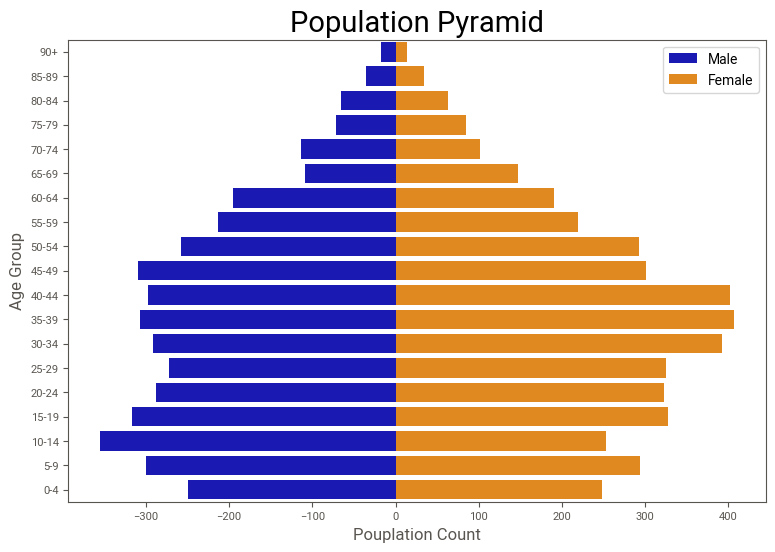

In [99]:
plt.figure(figsize=(9, 6))
age_pyramid = sns.barplot(x='male', y='age_group', data=age_group_df, order=order_list,
color=('mediumblue'), label='Male') 
 
age_pyramid = sns.barplot(x='female', y='age_group', data=age_group_df, order=order_list, 
color=('darkorange'), label='Female')  
 
age_pyramid.legend()

plt.xlabel('Pouplation Count', fontsize='12')
plt.ylabel('Age Group', fontsize='12')
plt.title('Population Pyramid', fontsize='21') 
plt.show()

### MARITAL STATUS 

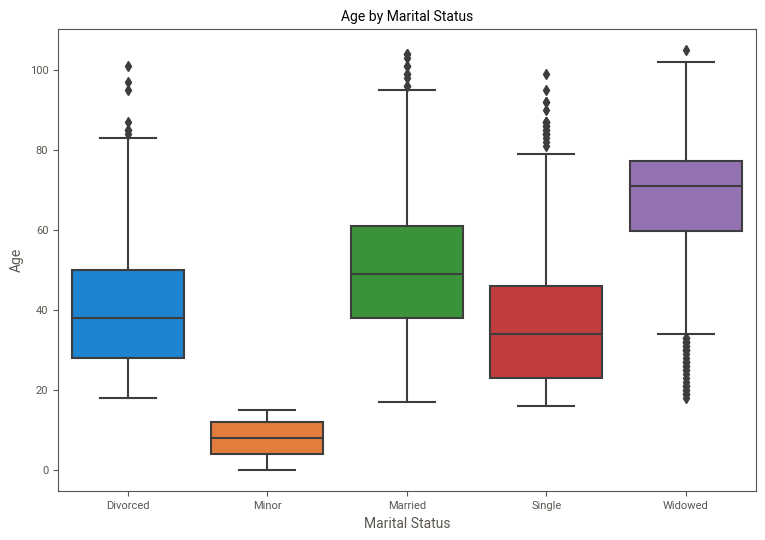

In [100]:
plt.figure(figsize=(9, 6))
sns.boxplot(x="Marital Status", y="Age", data = census_df2)
plt.title('Age by Marital Status', fontsize = 10)
plt.show()

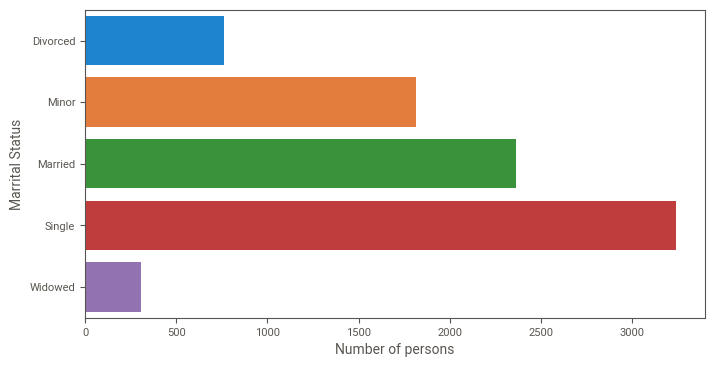

In [101]:
plt.figure(figsize=(8,4))
sns.countplot(data=census_df2,y='Marital Status')
plt.ylabel('Marrital Status')
plt.xlabel('Number of persons')
plt.show()

In [102]:
census_df2[census_df2['Age']>100]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,New_Occupation,Age Class
214,22,Cottinghamnail Road,Cameron,Saunders,104,Head,Married,Male,"Retired Radiographer, therapeutic",None,Catholic,Retired,90+
215,22,Cottinghamnail Road,Lorraine,Saunders,101,Wife,Married,Female,Retired Editorial assistant,None,Catholic,Retired,90+
362,6,Cambridge Avenue,Sean,White,104,Head,Married,Male,Retired Leisure centre manager,None,None,Retired,90+
363,6,Cambridge Avenue,Gillian,White,103,Wife,Married,Female,Retired Adult nurse,None,None,Retired,90+
407,32,Cambridge Avenue,Sean,Evans,105,Head,Widowed,Male,Retired Naval architect,None,Christian,Retired,90+
2291,40,August Lane,Katy,Goodwin,101,Head,Divorced,Female,"Retired Designer, exhibition/display",None,None,Retired,90+
4469,3,Upland Street,Jake,Owens,102,Head,Widowed,Male,Retired Seismic interpreter,None,Christian,Retired,90+
8357,27,Jenkins Land,Fiona,Quinn,101,Head,Married,Female,Retired Counselling psychologist,None,Catholic,Retired,90+


In [103]:
census_df2[(census_df2['Age']<=20) & (census_df2['Marital Status']=='Widowed')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,New_Occupation,Age Class
2442,23,Henge Avenue,Jack,Barber,18,Head,Widowed,Male,Student,None,None,Student,15-19
2470,2,Music Road,Mohammad,Russell,19,Son,Widowed,Male,University Student,None,Methodist,University Student,15-19
4230,12,London Drive,Timothy,McKenzie,20,Cousin,Widowed,Male,University Student,None,Methodist,University Student,20-24
5167,117,Upland Street,Marie,Ellis,19,Daughter,Widowed,Female,University Student,None,Christian,University Student,15-19
6613,154,Orchard Crescent,Gregory,Harper,20,Son,Widowed,Male,University Student,None,Catholic,University Student,20-24
6642,163,Orchard Crescent,Clifford,Leach,19,Son,Widowed,Male,University Student,None,None,University Student,15-19


In [104]:
#18 years as single instead of widowed
census_df2['Marital Status'].iloc[2442] = 'Single'

In [105]:
census_df2[(census_df2['Age']<20) & (census_df2['Marital Status']=='Widowed')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,New_Occupation,Age Class
2470,2,Music Road,Mohammad,Russell,19,Son,Widowed,Male,University Student,None,Methodist,University Student,15-19
5167,117,Upland Street,Marie,Ellis,19,Daughter,Widowed,Female,University Student,None,Christian,University Student,15-19
6642,163,Orchard Crescent,Clifford,Leach,19,Son,Widowed,Male,University Student,None,None,University Student,15-19


### INFIRMITY

In [106]:
census_df2.Infirmity.value_counts(normalize=True)*100

None                   99.269299
Physical Disability     0.164997
Unknown Infection       0.117855
Deaf                    0.117855
Mental Disability       0.117855
Blind                   0.106070
Disabled                0.106070
Name: Infirmity, dtype: float64

In [107]:
infirmity = census_df2[['Infirmity']].value_counts().describe()
infirmity = pd.DataFrame(infirmity)
infirmity

,0
count,7.000000
mean,1212.142857
std,3179.689578
min,9.000000
25%,9.500000
50%,10.000000
75%,12.000000
max,8423.000000


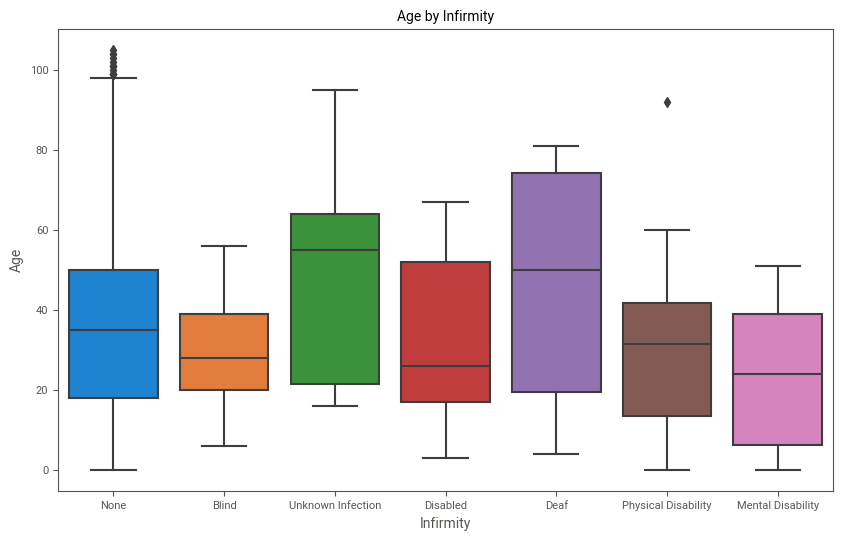

In [108]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Infirmity", y="Age", data = census_df2)
plt.title('Age by Infirmity', size =10)
plt.show()

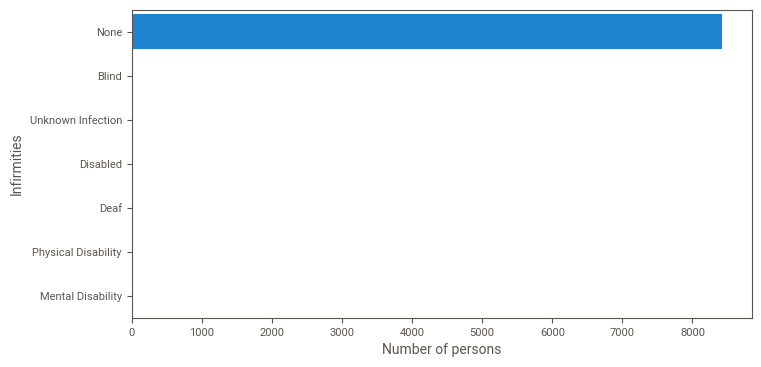

In [109]:
plt.figure(figsize=(8,4))
sns.countplot(data=census_df2,y='Infirmity')
plt.ylabel('Infirmities')
plt.xlabel('Number of persons')
plt.show()

In [110]:
def age_infirmity_(a,i):
    None_des = census_df2[a][census_df2[i] == 'None'].value_counts().describe()
    physical_des = census_df2[a][census_df2[i] == 'Physical Disability'].value_counts().describe()
    blind_des = census_df2[a][census_df2[i] == 'Blind'].value_counts().describe()
    disabled_des = census_df2[a][census_df2[i] == 'Disabled'].value_counts().describe()
    unknown_des = census_df2[a][census_df2[i] == 'Unknown Infection'].value_counts().describe()
    mental_des = census_df2[a][census_df2[i] == 'Mental Disability'].value_counts().describe()
    deaf_des = census_df2[a][census_df2[i] == 'Deaf'].value_counts().describe()
    return None_des,physical_des,blind_des,disabled_des,unknown_des,mental_des,deaf_des 
age_infirmity = age_infirmity_('Age Class', 'Infirmity')
age_infirmity = pd.DataFrame(age_infirmity)
age_infirmity['Disabilities'] = ['None','Physical Disability','Blind','Disabled','Unknown Infection','Mental Disability','Deaf']
age_infirmity

,count,mean,std,min,25%,50%,75%,max,Disabilities
Age Class,19.0,443.315789,229.896366,29.0,233.5,546.0,608.50,713.0,None
Age Class,9.0,1.555556,1.013794,1.0,1.0,1.0,2.00,4.0,Physical Disability
Age Class,7.0,1.285714,0.487950,1.0,1.0,1.0,1.50,2.0,Blind
Age Class,8.0,1.125000,0.353553,1.0,1.0,1.0,1.00,2.0,Disabled
Age Class,8.0,1.250000,0.707107,1.0,1.0,1.0,1.00,3.0,Unknown Infection
Age Class,8.0,1.250000,0.462910,1.0,1.0,1.0,1.25,2.0,Mental Disability
Age Class,8.0,1.250000,0.462910,1.0,1.0,1.0,1.25,2.0,Deaf


### RELIGIOUS AFFILIATIONS

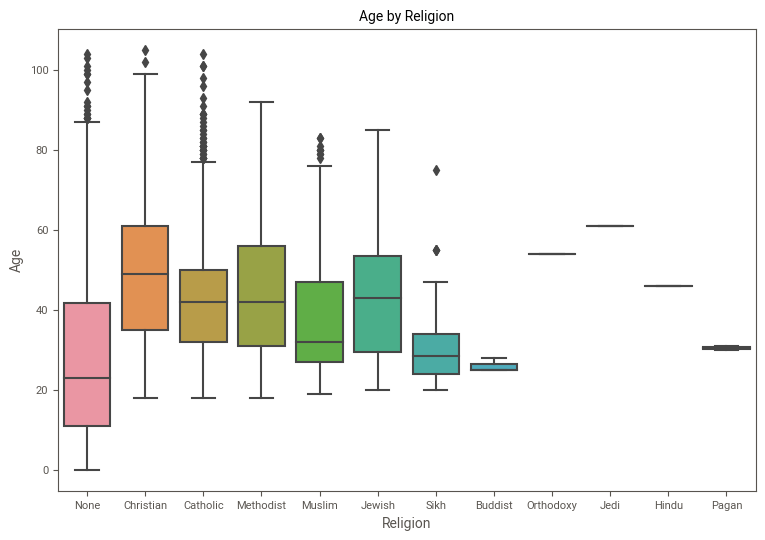

In [111]:
plt.figure(figsize=(9, 6))
sns.boxplot(x="Religion", y="Age", data = census_df2)
plt.title('Age by Religion', fontsize = 10)
plt.show()

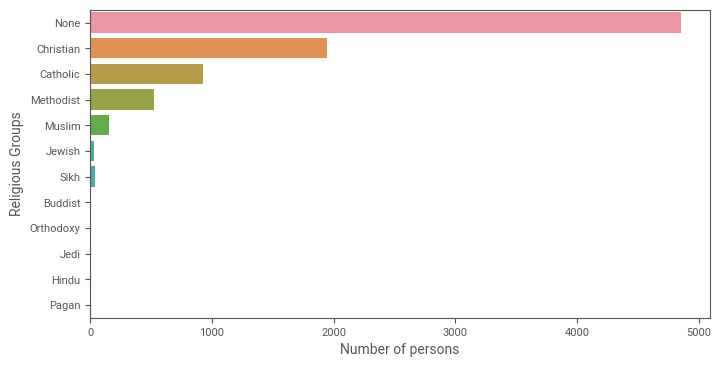

In [112]:
plt.figure(figsize=(8,4))
sns.countplot(data=census_df2,y='Religion')
plt.ylabel('Religious Groups')
plt.xlabel('Number of persons')
plt.show()

<Figure size 1500x900 with 0 Axes>

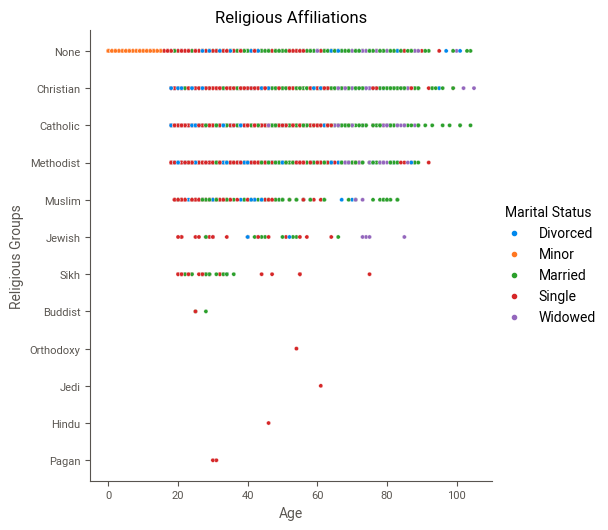

In [113]:
plt.figure(figsize=(15, 9))
sns.relplot(data = census_df2, x = 'Age', y = 'Religion',hue='Marital Status')
plt.ylabel('Religious Groups')
plt.xlabel('Age')
plt.title('Religious Affiliations', fontsize='12')
plt.show()

### UNEMPLOYMENT TREND

In [114]:
unemployed_df = census_df2[census_df2.Occupation == 'Unemployed']

<Figure size 2500x2000 with 0 Axes>

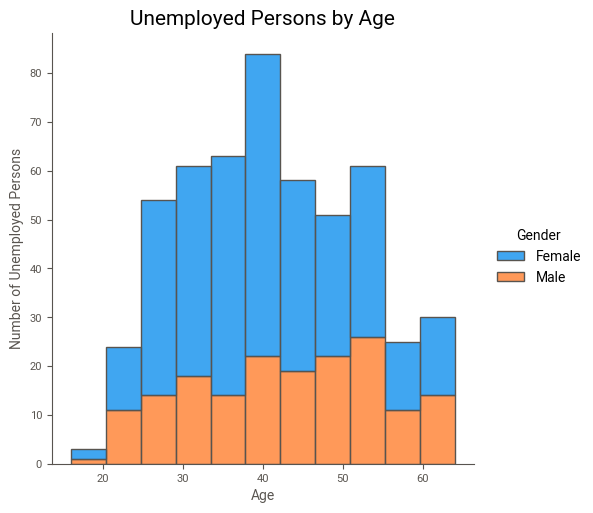

In [115]:
plt.figure(figsize=(25, 20))
sns.displot(x = unemployed_df['Age'], hue=unemployed_df['Gender'], multiple='stack')
plt.title('Unemployed Persons by Age', fontsize='15')
plt.ylabel('Number of Unemployed Persons')
plt.show()

In [116]:
# Calculates the average age for each religion type
for status in census_df2['Religion'].unique():
    avg = census_df2['Age'][census_df2['Religion'] == status].mean().round(2)
    print(f'{status}: {avg}')

None: 27.55
Christian: 48.82
Catholic: 42.79
Methodist: 44.64
Muslim: 38.99
Jewish: 44.06
Sikh: 31.48
Buddist: 26.0
Orthodoxy: 54.0
Jedi: 61.0
Hindu: 46.0
Pagan: 30.5


In [117]:
# Calculates the median age for each religion type
for status in census_df2['Religion'].unique():
    median = census_df2['Age'][census_df2['Religion'] == status].median()
    print(f'{status}: {median}')

None: 23.0
Christian: 49.0
Catholic: 42.0
Methodist: 42.0
Muslim: 32.0
Jewish: 43.0
Sikh: 28.5
Buddist: 25.0
Orthodoxy: 54.0
Jedi: 61.0
Hindu: 46.0
Pagan: 30.5


In [118]:
# Calculates the mode age for each religion type
for status in census_df2['Religion'].unique():
    mode = census_df2['Age'][census_df2['Religion'] == status].mode()[0].round(2)
    print(f'{status}:  {mode}')

None:  14
Christian:  51
Catholic:  40
Methodist:  40
Muslim:  31
Jewish:  28
Sikh:  34
Buddist:  25
Orthodoxy:  54
Jedi:  61
Hindu:  46
Pagan:  30


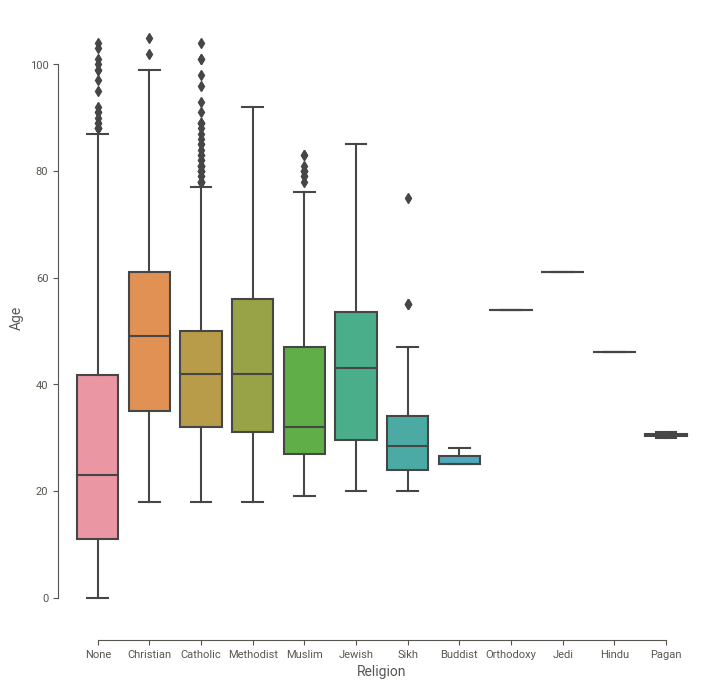

In [119]:
# Whisker plots for religion against age
plt.figure(figsize=(8,8))
sns.boxplot(y="Age", x="Religion", data=census_df2)
plt.xticks(rotation=60)
sns.despine(offset=10, trim=True)

In [120]:
census_df2.Religion.value_counts(normalize=True)*100

None         57.159694
Christian    22.946376
Catholic     10.901591
Methodist     6.187390
Muslim        1.803182
Sikh          0.494991
Jewish        0.412493
Buddist       0.035357
Pagan         0.023571
Orthodoxy     0.011786
Jedi          0.011786
Hindu         0.011786
Name: Religion, dtype: float64

In [121]:
#Statistics for the age in relation to the religious status
for status in census_df2['Religion'].unique():
    stats = census_df2[census_df2['Religion'] == status]
    print(f"{status}: {stats['Age'].describe()}")
    print('\n')

None: count    4850.000000
mean       27.553814
std        20.640619
min         0.000000
25%        11.000000
50%        23.000000
75%        41.750000
max       104.000000
Name: Age, dtype: float64


Christian: count    1947.000000
mean       48.817668
std        17.900092
min        18.000000
25%        35.000000
50%        49.000000
75%        61.000000
max       105.000000
Name: Age, dtype: float64


Catholic: count    925.000000
mean      42.788108
std       15.600410
min       18.000000
25%       32.000000
50%       42.000000
75%       50.000000
max      104.000000
Name: Age, dtype: float64


Methodist: count    525.00000
mean      44.64000
std       17.27588
min       18.00000
25%       31.00000
50%       42.00000
75%       56.00000
max       92.00000
Name: Age, dtype: float64


Muslim: count    153.000000
mean      38.993464
std       16.859909
min       19.000000
25%       27.000000
50%       32.000000
75%       47.000000
max       83.000000
Name: Age, dtype: float64


Jewish

### COMMUTERS AND AFFLUENCE LEVEL

In [122]:
#Based on occupation groups and demand for large housing.
#Based on population Growth
for occups in census_df2['Occupation'].head(20):
    print(occups)

Retail merchandiser
Child
Research officer, political party
Unemployed
Magazine journalist
Theatre manager
Child
Child
Animator
Surveyor, commercial/residential
Administrator, sports
Occupational hygienist
Tourist information centre manager
Merchandiser, retail
Student
Student
Student
Tree surgeon
Student
Student


In [123]:
census_df2[census_df2['Relationship to Head of House']=='Visitor']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,New_Occupation,Age Class
74,23,Marsh Turnpike,Carole,Gibbons,56,Visitor,Single,Female,"Designer, ceramics/pottery",None,None,Employed,55-59
735,9,Lisbon Stream,Julian,Herbert,52,Visitor,Single,Male,Metallurgist,None,None,Employed,50-54
736,9,Lisbon Stream,Sophie,Williams,55,Visitor,Single,Female,Dancer,None,Christian,Employed,55-59
985,36,Derbytag Drive,Hayley,Morgan,62,Visitor,Single,Female,"Lecturer, higher education",None,None,Employed,60-64
1128,14,Simpson Keys,Lisa,Read,40,Visitor,Single,Female,"Scientist, physiological",None,Christian,Employed,40-44
1707,19,Hammond Lane,Clive,Birch,34,Visitor,Single,Male,Sports coach,None,Muslim,Employed,30-34
1868,11,Worcester Drive,Roy,Walsh,62,Visitor,Divorced,Male,Graphic designer,None,None,Employed,60-64
2272,30,August Lane,Lucy,Morris,32,Visitor,Single,Female,Chief Strategy Officer,None,Christian,Employed,30-34
2349,2,Gemini Avenue,Joanne,Oliver,19,Visitor,Single,Female,University Student,None,Muslim,University Student,15-19
4401,18,Wells Lane,Kyle,Iqbal,30,Visitor,Single,Male,Physiotherapist,None,None,Employed,30-34


In [124]:
census_df2['New_Occupation'].value_counts()

Employed              4528
Student               1667
Retired                720
University Student     559
Unemployed             514
Child                  497
Name: New_Occupation, dtype: int64

In [125]:
employed = len(census_df2[census_df2['New_Occupation'] == 'Employed'])
university_commuters = len(census_df2[census_df2['New_Occupation'] == 'University Student'])
total_commuters = (employed*0.75) + university_commuters
print(f'The total number of possible commuters = {total_commuters}')

commuters_percentage = (total_commuters/8485)*100
print(f'The percentage of commuters = {int(commuters_percentage)}%')

total_number_employed_commuters = employed*0.75
employed_commuters_percentage = (53.6*total_number_employed_commuters)/4528
print(f'The number of employed commuters = {employed_commuters_percentage}%')

The total number of possible commuters = 3955.0
The percentage of commuters = 46%
The number of employed commuters = 40.2%


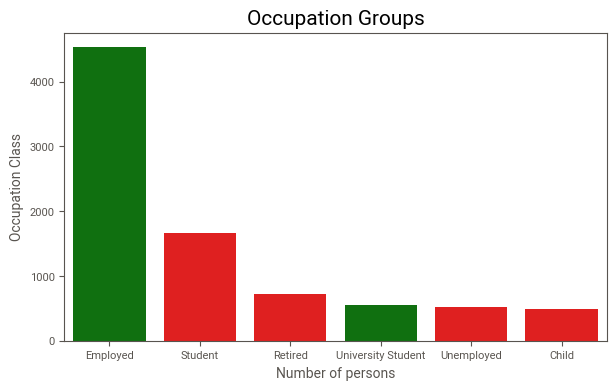

In [126]:
plt.figure(figsize=(7,4))
plt.title('Occupation Groups',fontsize='15')
sns.countplot(data=census_df2,x='New_Occupation', order=['Employed','Student','Retired','University Student','Unemployed','Child'],palette=['g','r','r','g','r','r'])
plt.ylabel('Occupation Class')
plt.xlabel('Number of persons')
plt.show()

<AxesSubplot:xlabel='New_Occupation', ylabel='Age'>

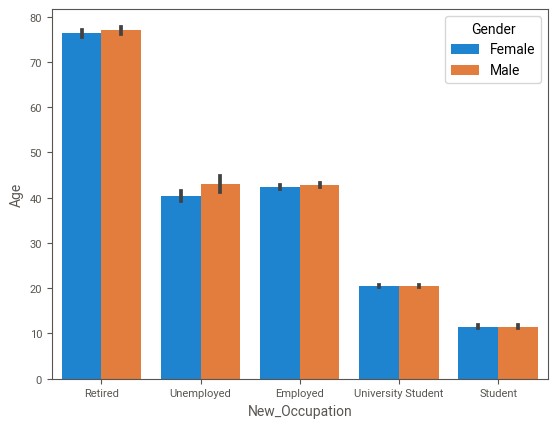

In [127]:
#sns.barplot(data=census_df2,x='New_Occupation',y='Age Class')
sns.barplot(data=census_df2,x='New_Occupation', y='Age', hue ='Gender', order=['Retired','Unemployed','Employed','University Student','Student'])

In [128]:
df = census_df2[['New_Occupation']].value_counts()
df=pd.DataFrame(df)
df.reset_index(inplace=True)
df.rename(columns={0:'Count','New_Occupation':'Group'}, inplace=True)

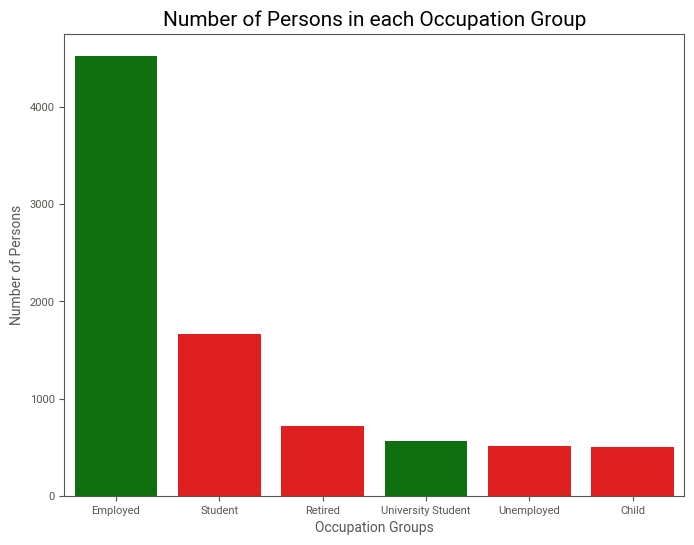

In [129]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Group',y='Count', palette=['g','r','r','g','r','r','r','r','r','r','r','r','r'])
plt.title('Number of Persons in each Occupation Group', fontsize='15')
plt.xlabel('Occupation Groups')
plt.ylabel('Number of Persons')
plt.show()

### OCCUPANCY LEVEL AND FAMILY SIZE

In [130]:
census_df2[['House Number', 'Street']].value_counts().mean().round(2)

3.01

In [131]:
house_count=census_df2[['House Number', 'Street']].value_counts().sort_values(ascending=False)
Household = pd.DataFrame(house_count)

In [132]:
Household.rename(columns={0:'Number of Occupants'}, inplace=True)

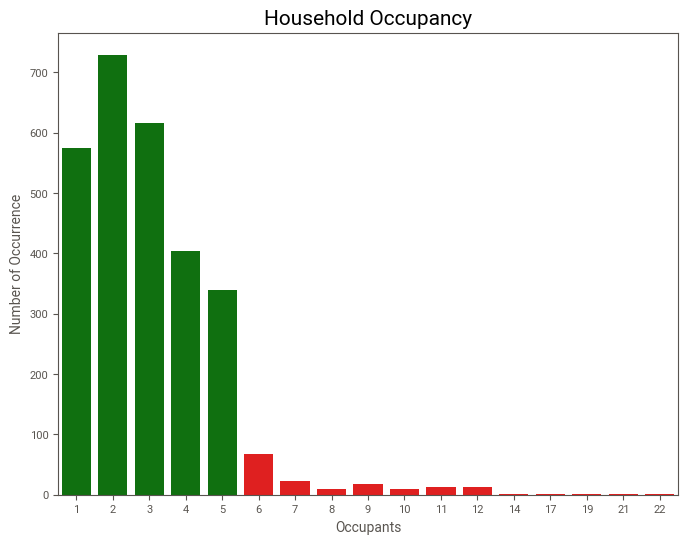

In [133]:
plt.figure(figsize=(8, 6))
sns.countplot(data=Household, x='Number of Occupants', palette=['g','g','g','g','g','r','r','r','r','r','r','r','r','r','r','r','r'])
plt.title('Household Occupancy', fontsize='15')
plt.xlabel('Occupants')
plt.ylabel('Number of Occurrence')
plt.show()

In [134]:
Household['Number of Occupants'].value_counts(normalize=True)

2     0.258511
3     0.218440
1     0.203901
4     0.143262
5     0.120567
6     0.023759
7     0.007801
9     0.006028
12    0.004610
11    0.004255
8     0.003191
10    0.003191
14    0.000709
22    0.000709
21    0.000355
17    0.000355
19    0.000355
Name: Number of Occupants, dtype: float64

In [135]:
family_count = census_df2[['Surname','Street','House Number']].value_counts().sort_values(ascending = False)
family = pd.DataFrame(family_count)

In [136]:
family.reset_index(inplace=True)
family.head(50)

,Surname,Street,House Number,0
0,Parker,Upland Street,59,12
1,Ellis,Upland Street,117,12
2,Green,White Trafficway,7,12
3,Matthews,Upland Street,77,11
4,Bradley,Upland Street,69,11
5,Cartwright,White Trafficway,12,11
6,Webb,Kelly Route,48,11
7,Perkins-Johnson,Kelly Route,41,10
8,Davies,Upland Street,21,10
9,Gray-Edwards,Upland Street,84,10


In [137]:
family.rename(columns={0:'Count'}, inplace=True)

In [138]:
family.head(50)

,Surname,Street,House Number,Count
0,Parker,Upland Street,59,12
1,Ellis,Upland Street,117,12
2,Green,White Trafficway,7,12
3,Matthews,Upland Street,77,11
4,Bradley,Upland Street,69,11
5,Cartwright,White Trafficway,12,11
6,Webb,Kelly Route,48,11
7,Perkins-Johnson,Kelly Route,41,10
8,Davies,Upland Street,21,10
9,Gray-Edwards,Upland Street,84,10


In [139]:
family.Count.value_counts(normalize=True)

1     0.570367
2     0.179914
3     0.127224
4     0.063049
5     0.039856
6     0.008557
7     0.003603
9     0.002252
10    0.001801
8     0.001801
11    0.000901
12    0.000676
Name: Count, dtype: float64

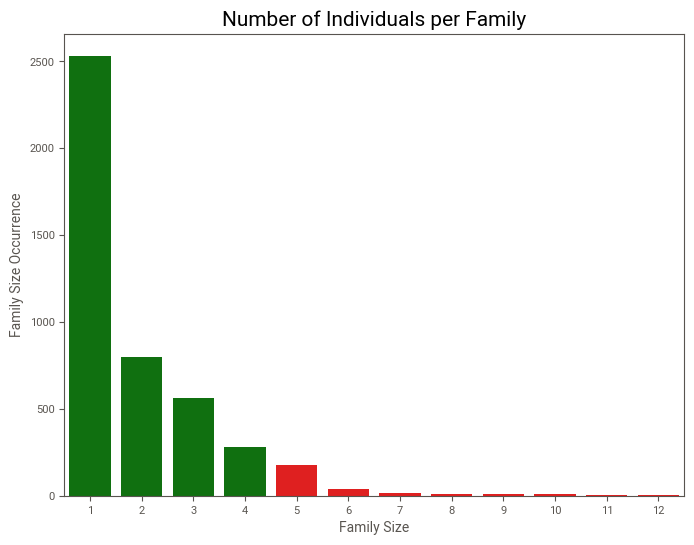

In [140]:
plt.figure(figsize=(8, 6))
sns.countplot(data=family, x='Count', palette=['g','g','g','g','r','r','r','r','r','r','r','r','r'])
plt.title('Number of Individuals per Family', fontsize='15')
plt.xlabel('Family Size')
plt.ylabel('Family Size Occurrence')
plt.show()

<Figure size 2000x5000 with 0 Axes>

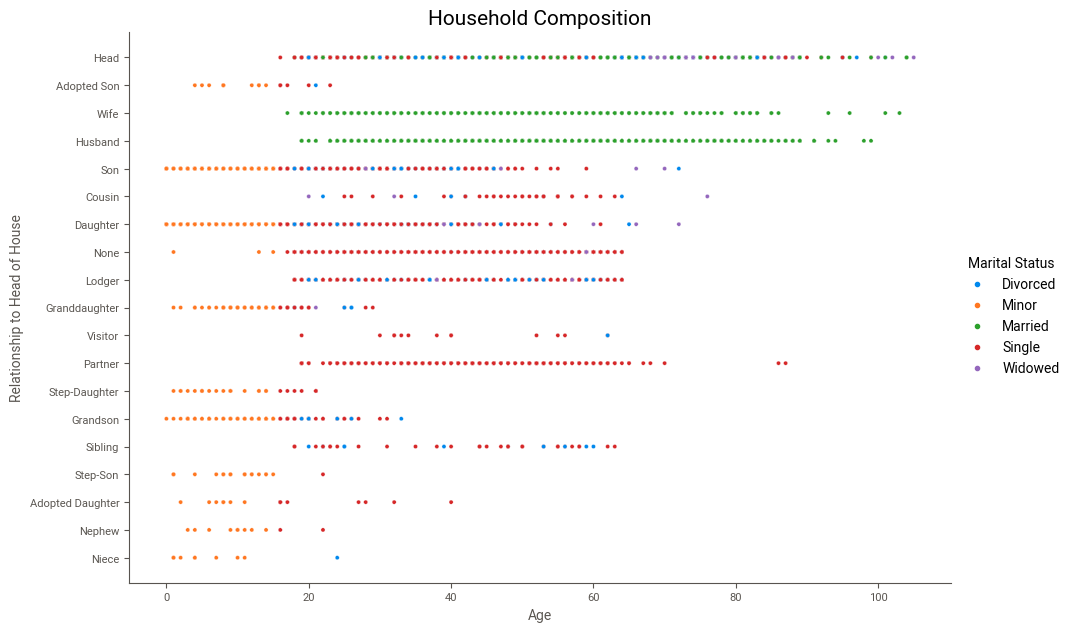

In [141]:
plt.figure(figsize=(20,50))
sns.relplot(data = census_df2, x = 'Age', y = 'Relationship to Head of House',hue='Marital Status', height=6, aspect=1.6)
plt.title('Household Composition', fontsize = '15')
plt.show()

### DIVORCED AND MARRIAGE RATE

Text(0, 0.5, 'Status')

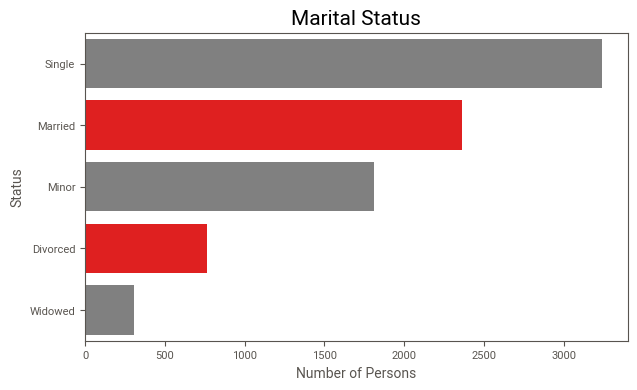

In [142]:
#https://matplotlib.org/stable/gallery/color/named_colors.html
plt.figure(figsize=(7,4))
#sns.displot(data = census_df2, y = 'Religion')
plt.title('Marital Status',fontsize='15')
sns.countplot(data = census_df2, y = 'Marital Status', order= ['Single','Married','Minor','Divorced','Widowed'], palette=['grey','r','grey','r','grey'])
plt.xlabel('Number of Persons')
plt.ylabel('Status')

In [143]:
census_df2['Marital Status'].value_counts(normalize=True)

Single      0.381732
Married     0.278609
Minor       0.213671
Divorced    0.089806
Widowed     0.036181
Name: Marital Status, dtype: float64

In [144]:
married = len(census_df2[census_df2['Marital Status'] == 'Married'])
divorced = len(census_df2[census_df2['Marital Status'] == 'Divorced'])

In [145]:
female_divorcees = len(census_df2[(census_df2['Marital Status']=='Divorced') & (census_df2['Gender']=='Female')])
male_divorcees = len(census_df2[(census_df2['Marital Status']=='Divorced') & (census_df2['Gender']=='Male')])
print(female_divorcees,',',male_divorcees)

474 , 288


In [146]:
print(int(((married/2)/8485)*1000))

print(int(((female_divorcees)/8485)*1000))

139
55


### BIRTH and DEATH RATE

In [147]:
current_year_birth = census_df2[census_df2['Age'] == 0].count() #number of babies 
past_year_birth = census_df2[census_df2['Age'] == 1].count()
number_of_births = current_year_birth['Age']
# number_of_births['Age']

birth_rate = ((number_of_births/8485)*1000).round(2)
birth_rate

9.78

In [148]:
#Calculate the number of persons in each age class
class_1 = census_df2[census_df2['Age Class']=='0-4'].count()
class_2 = census_df2[census_df2['Age Class']=='5-9'].count()
class_3 = census_df2[census_df2['Age Class']=='10-14'].count()
class_4 = census_df2[census_df2['Age Class']=='15-19'].count()
class_5 = census_df2[census_df2['Age Class']=='20-24'].count()
class_6 = census_df2[census_df2['Age Class']=='25-29'].count()
class_7 = census_df2[census_df2['Age Class']=='30-34'].count()
class_8 = census_df2[census_df2['Age Class']=='35-39'].count()
class_9 = census_df2[census_df2['Age Class']=='40-44'].count()
class_10 = census_df2[census_df2['Age Class']=='45-49'].count()
class_11 = census_df2[census_df2['Age Class']=='50-54'].count()
class_12 = census_df2[census_df2['Age Class']=='55-59'].count()
class_13 = census_df2[census_df2['Age Class']=='60-64'].count()
class_14 = census_df2[census_df2['Age Class']=='65-69'].count()
class_15 = census_df2[census_df2['Age Class']=='70-74'].count()
class_16 = census_df2[census_df2['Age Class']=='75-79'].count()
class_17 = census_df2[census_df2['Age Class']=='80-84'].count()
class_18 = census_df2[census_df2['Age Class']=='85-89'].count()
class_19 = census_df2[census_df2['Age Class']=='90+'].count()

#the difference between the age classes
death_rate_list = [class_19['Age'] - class_18['Age'],
        class_18['Age'] - class_17['Age'],
        class_17['Age'] - class_16['Age'],
        class_16['Age'] - class_15['Age'],
        class_15['Age'] - class_14['Age'],
        class_14['Age'] - class_13['Age'],
        class_13['Age'] - class_12['Age'],
        class_12['Age'] - class_11['Age'],
        class_11['Age'] - class_10['Age'],
        class_10['Age'] - class_9['Age'],
        class_9['Age'] - class_8['Age'],
        class_8['Age'] - class_7['Age'],
        class_7['Age'] - class_6['Age'],
        class_6['Age'] - class_5['Age'],
        class_5['Age'] - class_4['Age'],
        class_4['Age'] - class_3['Age'],
        class_3['Age'] - class_2['Age'],
        class_2['Age'] - class_1['Age'],
        class_1['Age']
        ]
print(death_rate_list)
print('\n')
print(f'Number of deaths = {sum(death_rate_list)}')

[-39, -59, -27, -59, -41, -130, -46, -119, -60, -88, -15, 30, 87, -14, -33, 36, 14, 97, 497]


Number of deaths = 31


In [149]:
death_rate = int((31/8485)*1000)
death_rate

3

### IMMIGRATION 

In [150]:
number_of_immigrants = len(census_df2[census_df2['Relationship to Head of House'].isin(['Visitor','Lodger','None'])])
number_of_emmigrants = len(census_df2[census_df2['Marital Status'] == 'Divorced'])

net_migrants = number_of_immigrants - number_of_emmigrants
net_migrants

285